# Project: Write a Data Science Blog Post
### Business Understanding
We would like to determine the languages/frameworks/databases a new developer should focus on to maximize compensation.  To that end, the following questions should be answered:
1. What is the average salary of all users of a certain language?
2. What is the average salary of all users of a certain framework?
3. What is the average salary of all users of a certain database?

# Data Understaning

In [14]:
# Import the relevant libraries and plugins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import zipfile
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic
%matplotlib inline

#Suppress pandas erros
pd.set_option('mode.chained_assignment', None)

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [15]:
# Load the data
data=zipfile.ZipFile("./survey_results_public.zip","r")
data.extractall('./')

# Read the csv file into a dataframe and look at the first 5 rows
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [9]:
# get descrition of all columns
df.describe(include='all')

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
count,51392.000000,51392,51392,51392,51392,51392,51392,42841,44008,38922,...,31062,35047,34938,33033,34720,34536,34419,34612,12891.000000,2566.000000
unique,NaN,5,4,201,4,7,9,16,7,10,...,5,29,10,97,5,5,5,5,NaN,NaN
top,NaN,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
freq,NaN,36131,24801,11455,37543,36148,21609,21409,15454,8587,...,18200,31589,10175,23415,11257,16061,20955,14603,NaN,NaN
mean,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56298.480641,33142.220468
std,14835.736854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39880.905277,30162.988829
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,12848.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26440.371839,4490.492484
50%,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,29364.263691
75%,38544.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000.000000,50403.225806


In [10]:
# Get number of row and columns
num_row= df.shape[0]
num_col= df.shape[1]
print("number of rows: {}".format(num_row))
print("number of columns: {}".format(num_col))

number of rows: 51392
number of columns: 154


In [12]:
# Get the heasers
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [21]:
# Evaluate which columns have null values
df.isnull().sum()


<bound method Series.to_string of Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64>

# Prepare Data
### Focus on only data from US respondents since salaray is highly depdendend on geographical location

In [23]:
# Select data from users that are only from the US since salary is dependent on geographical location
us_data = df[df["Country"]=="United States"]
us_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Strongly disagree,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN


In [32]:
# Evaluate which columns us only US respondents have null values
print(us_data.isnull().sum().to_markdown())

|                                  |     0 |
|:---------------------------------|------:|
| Respondent                       |     0 |
| Professional                     |     0 |
| ProgramHobby                     |     0 |
| Country                          |     0 |
| University                       |     0 |
| EmploymentStatus                 |     0 |
| FormalEducation                  |     0 |
| MajorUndergrad                   |  1305 |
| HomeRemote                       |  1439 |
| CompanySize                      |  2177 |
| CompanyType                      |  2194 |
| YearsProgram                     |    53 |
| YearsCodedJob                    |  2033 |
| YearsCodedJobPast                | 11215 |
| DeveloperType                    |  3147 |
| WebDeveloperType                 |  8920 |
| MobileDeveloperType              | 11218 |
| NonDeveloperType                 | 10289 |
| CareerSatisfaction               |  1583 |
| JobSatisfaction                  |  2133 |
| ExCoderR

In [33]:
# Drop all rows that do not have a framework listed since their salary data is not tied a framework
framework_drop=us_data.dropna(subset=["HaveWorkedFramework", "Salary"],axis=0)

# Drop all rows that do not have a language listed since their salary data is not tied a language
language_drop = us_data.dropna(subset=["HaveWorkedLanguage", "Salary"],axis=0)

# Drop all rows that do not have a database listed since their salary data is not tied a database
database_drop=us_data.dropna(subset=["HaveWorkedDatabase", "Salary"],axis=0)

# Evaluation

### Question 1 - What is the average salary of all users of a certain language?

Analysis and Visualization

In [ ]:
# Parses out all unique languages respondents reported in a set
language_dict = []
for index, row in language_drop.iterrows():
    try:
        languages=row["HaveWorkedLanguage"].split()
        for language in languages:
            if language not in language_dict:
                language_dict.append(str(language))
    except Exception as e:
        print(e)
language_dict = [s.replace(';','') for s in language_dict]
language_dict=set(language_dict)

# Calulcate average salary of users each language and and store into salary_language_average dataframe
salary_language_average = pd.DataFrame(language_dict,columns=["Language"])
salary_language_average["AverageSalaray"] = 0
for index, row in salary_language_average.iterrows():
    ave=language_drop[language_drop["HaveWorkedLanguage"].str.contains(row["Language"])]["Salary"].mean()
    salary_language_average["AverageSalaray"].loc[index]=ave

 # Plot the average salary of users each language  
salary_language_average.set_index('Language', inplace=True)
salary_language_average.sort_values('AverageSalaray').plot(kind='barh', legend=None, figsize=(20,10))
plt.xlabel("Average Salary")
plt.ylabel("Language")
plt.show()

### Interpretation
The top three languages that had the highest average salary were SmallTalk, Clojure and Erlang with an average salary of approximately $117K.

### Question 2 - What is the average salary of all users of a certain framework?

Analysis and Visualization

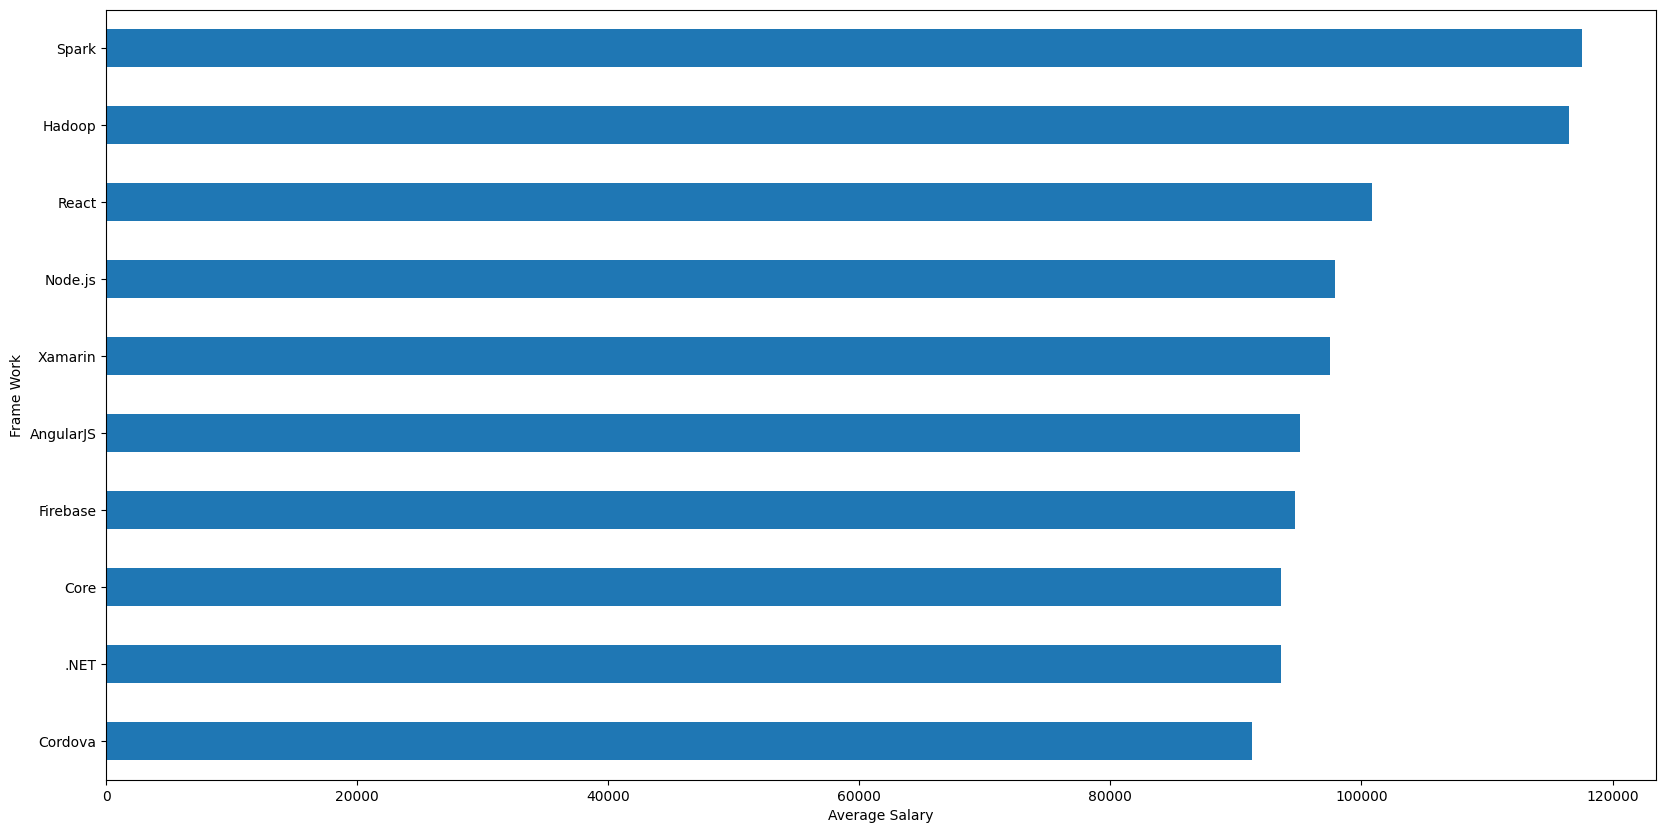

In [29]:
# Parses out all unique frameworks respondents reported in a set
framework_dict=[]
for index, row in framework_drop.iterrows():
    try:
        frameworks=row["HaveWorkedFramework"].split()
        for framework in frameworks:
            if framework not in framework_dict:
                framework_dict.append(str(framework))
    except Exception as e:
        print(e)
framework_dict=[s.replace(';','') for s in framework_dict]
framework_dict=set(framework_dict)

# Calulcate average salary of users each frawework and and store into framework_salary
framework_salary = pd.DataFrame(framework_dict,columns=["Framework"])
framework_salary["AverageSalaray"]=0
for index, row in framework_salary.iterrows():
    ave=framework_drop[framework_drop["HaveWorkedFramework"].str.contains(row["Framework"])]["Salary"].mean()
    framework_salary["AverageSalaray"].loc[index]=ave

 # Plot the average salary of users each Framework
framework_salary.set_index('Framework', inplace=True)
framework_salary.sort_values('AverageSalaray').plot(kind='barh', legend=None, figsize=(20,10))
plt.xlabel("Average Salary")
plt.ylabel("Frame Work")
plt.show()

## Interpreation
The top two frameworks that had the highest average salary were
Spark and Hadoop with an average salary of approximately $117K.

### Question 3 - What is the average salary of all users of a certain database?

Analysis and Visualization

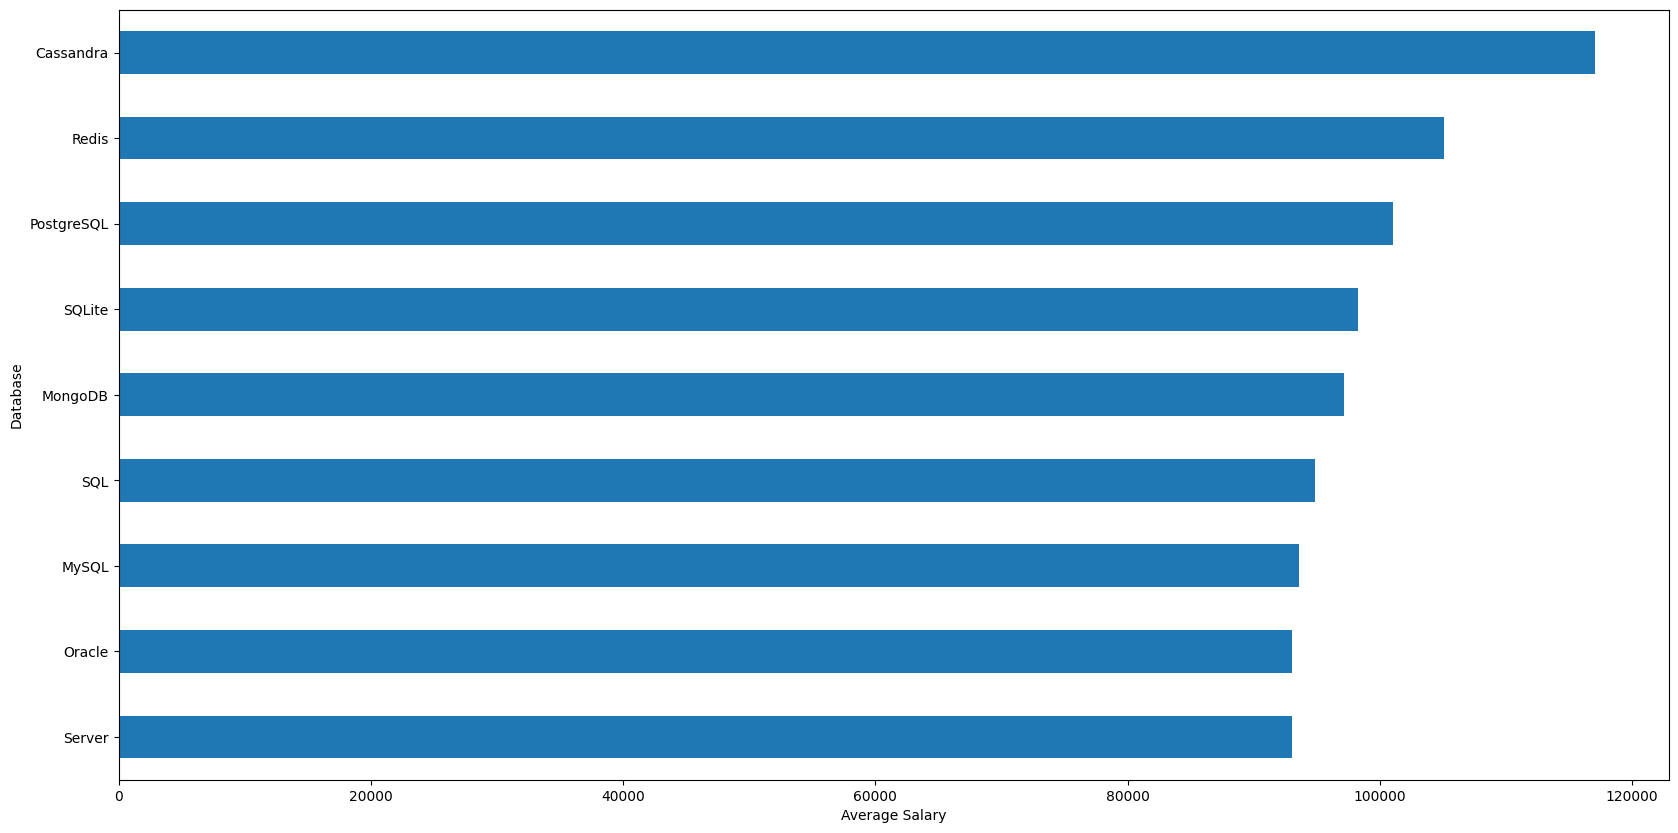

In [30]:
# Parses out all unique database respondents reported in a set
database_dict=[]
for index, row in database_drop.iterrows():
    try:
        databases=row["HaveWorkedDatabase"].split()
        for database in databases:
            if database not in database_dict:
                database_dict.append(str(database))
    except Exception as e:
        print(e)
database_dict=[s.replace(';','') for s in database_dict]
database_dict=set(database_dict)

# Calulcate average salary of users each database and and store into framework_salary
salary_database=pd.DataFrame(database_dict,columns=["Database"])
salary_database["AverageSalaray"]=0
for index, row in salary_database.iterrows():
    ave=database_drop[database_drop["HaveWorkedDatabase"].str.contains(row["Database"])]["Salary"].mean()
    salary_database["AverageSalaray"].loc[index]=ave

 # Plot the average salary of users each database
salary_database.set_index('Database', inplace=True)
salary_database.sort_values('AverageSalaray').plot(kind='barh', legend=None, figsize=(20,10))
plt.xlabel("Average Salary")
plt.ylabel("Database")
plt.show()

### Interpretation
The top database that had the highest average salary was Cassandra with an average salary of approximately $117K.